# Haben der Anteil der Ausländer_innen und die Alterstruktur einen Einfluss auf das Wahlergebnis der AfD in Dortmund?

Die Forschungsfrage wird im Folgenden beantwortet, indem wir die Zusammenhänge zwischen Ausländer_innenanteil, sowie Altersstruktur und der Anzahl an AfD-Zweitwähler_innenstimmen in den zwölf Stadtteilen Dortmunds untersuchen.

## Definitionen

Als Ausländer_innen definiert sind Menschen ohne deutsche Staatsbürgerschaft. Unter dem Begriff Senior_innen werden Menschen, die im Rentenalter sind, verstanden.

## Datensatz

Zuerst wird die Programmbibliothek Pandas importiert, um Datenanalysen durchführen zu können. Ebenso wird der Forschungsdatensatz (Version drei) importiert. Die Stichprobe, welche wir als Forschungsdatensatz verwenden enthält Daten aus den Jahren der letzten und vorletzten Bundestatgswahlen (2017, 2013).

In [9]:
#Programmbibliothek Pandas importieren
import pandas as pd
#vollständige Anzeige aller Spalten einstellen
pd.options.display.max_columns = None

#Forschungsdatensatz Version drei, vollständige Daten importieren
dortmund = pd.read_csv('Forschungsdatensatz_v3.csv')
dortmund.head(n=12)

,Stadtbezirk,Deutsch2017,Ausländer2017,Deutsch2016,Ausländer2016,Deutsch2013,Ausländer2013,Deutsch2012,Ausländer2012,Wahlberechtigte2017,WählerInnen2017,UngültigeZweitstimmen2017,GültigeZweitstimmen2017,AfDZweitstimmen2017,Wahlberechtigte2013,WählerInnen2013,UngültigeZweitstimmen2013,GültigeZweitstimmen2013,AfDZweitstimmen2013,2017Alter0bis2,2017Alter3bis5,2017Alter6bis17,2017Alter18bis24,2017Alter25bis34,2017Alter35bis49,2017Alter50bis64,2017Alter65bis70,2017Alter80uÄ,2013Alter0bis2,2013Alter3bis5,2013Alter6bis17,2013Alter18bis24,2013Alter25bis34,2013Alter35bis49,2013Alter50bis64,2013Alter65bis79,2013Alter80uÄ
0,Innenstadt-West,43702,9621,43828,9563,44023,8008,43775,7747,22014,11796,208,11588,1148,23627,11860,194,11666,401,1356,1136,4172,5773,11713,10331,9927,6215,2700,1238,1102,4123,5729,10667,11095,9259,6294,2524
1,Innenstadt-Nord,29035,30444,29569,30080,31106,23886,31163,22001,41632,32291,204,32087,2318,41679,30478,273,30205,1205,2349,2193,8374,7692,11065,12450,8893,4941,1522,1940,1921,7187,7182,9926,12025,8336,5103,1372
2,Innenstadt-Ost,48147,8207,47785,7615,47682,6555,47397,6293,38056,28707,185,28522,2114,38272,27430,283,27147,985,1624,1297,4240,4234,10901,11702,10830,7907,3619,1348,1185,3959,4221,9905,11612,10450,8082,3475
3,Eving,29224,9103,29378,8833,29774,7006,29756,6412,23742,15858,197,15661,2169,24250,15386,203,15183,736,1140,1051,4393,3426,5274,7868,7829,5176,2170,902,1013,4492,3328,4546,8075,7279,5246,1899
4,Scharnhorst,38301,7574,38586,7183,39230,4993,39461,4747,31072,20677,281,20396,3053,32048,20034,260,19774,774,1436,1503,5946,3559,5232,8751,9756,6784,2908,1144,1258,5616,3486,4856,8913,9348,7099,2503
5,Brackel,50266,5828,50460,5735,50515,4013,50406,3740,42599,31348,301,31047,3469,42989,29531,311,29220,1225,1503,1498,5645,3891,6517,10658,13330,9064,3988,1196,1263,5540,3998,6004,11281,12346,9587,3313
6,Aplerbeck,51188,4117,51379,3942,51816,3140,51896,3006,43266,33486,200,33286,2945,43600,32173,253,31920,1289,1307,1353,5788,3591,5754,10736,13140,9353,4283,1232,1269,6070,3536,5538,11920,12156,9812,3423
7,Hörde,47967,7551,48018,7492,47502,5808,47596,5698,40607,30669,231,30438,2726,40187,28519,280,28239,1146,1504,1337,5596,4084,7132,11013,12302,8869,3681,1188,1268,5550,3850,6344,11497,11436,9113,3064
8,Hombruch,51367,5687,51421,5744,51836,4700,51813,4429,43870,35169,201,34968,2682,44076,33952,297,33655,1395,1295,1256,5407,5528,7255,10366,12523,9087,4337,1139,1231,5610,5179,7104,11500,11564,9319,3890
9,Lütgendortmund,42435,6267,42695,5950,43557,4551,43620,4263,35852,25013,214,24799,3098,36598,23570,225,23345,984,1265,1310,5108,4309,6582,9280,11314,6765,2769,1166,1185,5216,4259,6066,10330,10583,6791,2512


## Vorüberlegungen zu Relationen und Verteilungen

Im Folgenden werden die Relationen und Verteilungen der Ausländer_innen, sowie der verschiedenen Altersgruppen (*Aufzählen??*) auf die Stadtteile in den jeweiligen Jahren betrachtet, um einen ersten Einblick in die Daten zu bekommen.

### Ausländer_innen

Um einen ersten Überblick über die Einwohnerverteilung nach ethnischer Zugehörigkeit in den Stadtbezirken Dortmunds zu gewinnen, wird exemplarisch für das Jahr 2017 ein Balkendiagramm erstellt.



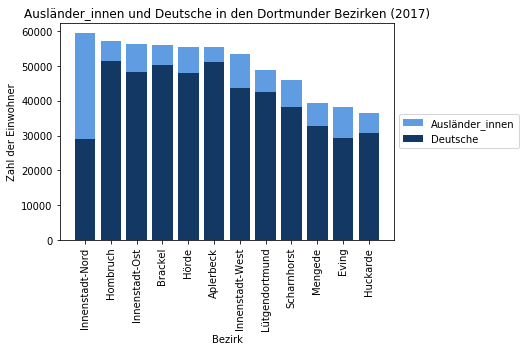

In [40]:
import matplotlib.pyplot as plt

#Erstellen der Spalte Gesamteinwohnerzahl Dortmund 2017
dortmund['EinwohnerGesamt2017'] = dortmund['Ausländer2017'] + dortmund['Deutsch2017']

deutsch2017 = dortmund.sort_values('EinwohnerGesamt2017',ascending=False)['Deutsch2017']
ausländer2017 = dortmund.sort_values('EinwohnerGesamt2017',ascending=False)['Ausländer2017']
#die Variablen vorab zu definieren, ist nicht nötig, macht aber den Code unten etwas lesbarer.

serie1 = plt.bar(range(len(dortmund)), deutsch2017, color='#133863')
serie2 = plt.bar(range(len(dortmund)), ausländer2017, bottom=deutsch2017, color='#609CE1')  
plt.xticks(range(len(dortmund)), dortmund.sort_values('EinwohnerGesamt2017',ascending=False)['Stadtbezirk'],rotation=90) 


plt.title('Ausländer_innen und Deutsche in den Dortmunder Bezirken (2017)') 
plt.xlabel('Bezirk') 
plt.ylabel('Zahl der Einwohner') 
#Fügt eine Legende rechts neben dem Diagramm hinzu.
plt.legend((serie2,serie1), ('Ausländer_innen','Deutsche'), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show() 

Nachfolgend wird die Verteilung der Ausländer_innen in absoluten Zahlen für die Zeiträume der Bundestagswahljahre und deren Vorjahre betrachtet.

In [11]:
#Dataframe Ausländer_innenverteilung in Dortmund für die Jahre 2013 und 2017
dortmundVrtlngAusl = dortmund[['Ausländer2013', 'Ausländer2017']]
dortmundVrtlngAusl.describe()


,Ausländer2013,Ausländer2017
count,12.000000,12.000000
mean,6804.666667,8887.583333
std,5551.573083,6968.586624
min,3140.000000,4117.000000
25%,4499.000000,5792.750000
50%,4846.500000,7076.000000
75%,6667.750000,8431.000000
max,23886.000000,30444.000000


Verteilung:

Die Tabelle wurde erstellt um die Verteilung im Betrachtungszeitraum von einem Jahr in den verschiedneen Stadtteilen zu ermitteln. Hieraus wird erkennbar, dass in allen Jahren keine schiefe Verteilung der Ausländer_innenzahlen auftritt, da die Standardabweichung jeweils nicht größer als der Mittelwert ist. Zudem ist festzustellen, dass die Mittelwerte und die Mediane nicht gleich sind, was bedeutet, dass auch keine gleichmäßige Verteilung besteht. 

Die Mittelwerte und Mediane der betrachteten Jahre steigen etwa gleich stark an. Daraus kann abgeleitet werden, dass der Anteil an Ausländer_innen relativ gleichmäßig über alle Stadtbezirke wächst.

Bei der Betrachtung der Mittelwerte der verschiedenen Jahre ist festzustellen, dass die Mittelwerte der Ausländer_innenzahlen gravierend ansteigen. Allerdings kann daraus nicht geschlossen werden, ob sich die Anzahl an Ausländer_innen in den Stadtteilen Dortmunds gemessen an der Gesamteinwohnerzahl auch relativ verändert.
Folglich schauen wir uns die Entwicklung der relativen Zahlen an.

In [12]:
#Erstellen der Spalte Gesamteinwohnerzahl Dortmund 2013
dortmund['EinwohnerGesamt2013'] = dortmund['Ausländer2013'] + dortmund['Deutsch2013']
#Erstellen der Spalte für die relative Anzahl der Ausländer_innen 2013
dortmund['RelAusländer2013'] = dortmund['Ausländer2013']/ dortmund['EinwohnerGesamt2013']
#Erstellen der Spalte für die relative Anzahl der Ausländer_innen 2017
dortmund['RelAusländer2017'] = dortmund['Ausländer2017']/ dortmund['EinwohnerGesamt2017']

#Differenz relativer Zahlen von Ausländer_innen zu 2013 und 2017 bilden
dortmund['DiffRelAusl1317'] = dortmund['RelAusländer2017'] - dortmund['RelAusländer2013']

#Dataframe aus den zuvor ermittelten Spalten
RelAuslundDiff = dortmund[['Stadtbezirk', 'RelAusländer2013', 'RelAusländer2017', 'DiffRelAusl1317']]
RelAuslundDiff.head(n=12)

,Stadtbezirk,RelAusländer2013,RelAusländer2017,DiffRelAusl1317
0,Innenstadt-West,0.153908,0.180429,0.026520
1,Innenstadt-Nord,0.434354,0.511845,0.077490
2,Innenstadt-Ost,0.120858,0.145633,0.024775
3,Eving,0.190484,0.237509,0.047025
4,Scharnhorst,0.112905,0.165101,0.052196
5,Brackel,0.073595,0.103897,0.030302
6,Aplerbeck,0.057137,0.074442,0.017305
7,Hörde,0.108948,0.136010,0.027062
8,Hombruch,0.083133,0.099677,0.016545
9,Lütgendortmund,0.094600,0.128681,0.034081


Wir haben die Differenzen der relativen Anzahl an Ausländer_innen der Jahre zu den Bundestagswahlen 2013 und 2017 errechnet. Zwischen den Jahren 2013 und 2017 ist ein deutlicher Anstieg dieser sichtbar.

Die relative Differenz für die Jahre 2013 und 2017 wird summiert und durch die Anzahl der Stadtteile geteilt, um den relativen Anstieg der Mittelwerte zu errechnen. Diese Ergebnisse  spiegeln sich in den zuvor ermittelten Ergebnissen zu dem Anstieg des Mittelwerts der absouluten Zahlen wieder.

In [13]:
#Überprüfen durch arithmetisches Mittel relativer Ausländer_innenzahlen, Quotient Anzahl Stadtteile
print("Der relative Anstieg der Mittelwerte zwischen 2013 und 2017 beträgt " + str((dortmund['DiffRelAusl1317'].sum()/12*100).round(2)) + " Prozent.")


Der relative Anstieg der Mittelwerte zwischen 2013 und 2017 beträgt 3.61 Prozent.


Auch wird diese Entwicklung durch Anwendung der folgenden Funktion untermalt:

In [14]:
#Verhältnisse über Funktion "describe" zu relativen Zahlen erstellen
RelAuslundDiff.describe()

,RelAusländer2013,RelAusländer2017,DiffRelAusl1317
count,12.000000,12.000000,12.000000
mean,0.139433,0.175519,0.036086
std,0.099404,0.114145,0.017284
min,0.057137,0.074442,0.016545
25%,0.091733,0.122485,0.026084
50%,0.116882,0.150189,0.031711
75%,0.129715,0.171302,0.046713
max,0.434354,0.511845,0.077490


Um diesen Beweis mit einem Beispiel zu untermalen, nehmen wir die Mittelwerte der relativen Ausländer_innenzahl 2013 und 2017 und schauen uns an, um welchen Wert diese gestiegen sind:

In [15]:
meanRelAusl2013 = RelAuslundDiff['RelAusländer2013'].mean()
meanRelAusl2017 = RelAuslundDiff['RelAusländer2017'].mean()
diffMeanRelAusl1317 = round(((meanRelAusl2017 - meanRelAusl2013)*100),2)
print(diffMeanRelAusl1317)

3.61


Die soeben ermittelte Zahl von rund 3,61 Prozent spiegelt den zuvor errechneten Anstieg der Ausländer_innenzahlen von 2013 zu 2017 wieder.

### Altersgruppen

*To-Do:
1. Describe für relative Zahlen auswerten
2. Alterverteilung in Balkendiagramm (Stacked) aus absoluten Zahlen exemplarisch für 2017 (unter der Bedingung, dass sich Werte nicht drastisch und unterschiedlich geändert haben) -->Noch erklären?
*

In [16]:
#Berechnung relativer Werte aller Altersgruppen der Jahre 2013 und 2017
dortmund['2013RelMenschen18bis24'] = dortmund ['2013Alter18bis24'] / dortmund['EinwohnerGesamt2013']
dortmund['2017RelMenschen18bis24'] = dortmund ['2017Alter18bis24'] / dortmund['EinwohnerGesamt2017']
dortmund['2013RelMenschen25bis34'] = dortmund ['2013Alter25bis34'] / dortmund['EinwohnerGesamt2013']
dortmund['2017RelMenschen25bis34'] = dortmund ['2017Alter25bis34'] / dortmund['EinwohnerGesamt2017']
dortmund['2013RelMenschen35bis49'] = dortmund ['2013Alter35bis49'] / dortmund['EinwohnerGesamt2013']
dortmund['2017RelMenschen35bis49'] = dortmund ['2017Alter35bis49'] / dortmund['EinwohnerGesamt2017']
dortmund['2013RelMenschen50bis64'] = dortmund ['2013Alter50bis64'] / dortmund['EinwohnerGesamt2013']
dortmund['2017RelMenschen50bis64'] = dortmund ['2017Alter50bis64'] / dortmund['EinwohnerGesamt2017']

#Berechnen der Anzahl von Menschen über 65 Jahre in der Gesamtbevölkerung 2013 in neuer Spalte
dortmund ['2013MenschenAb65'] = dortmund ['2013Alter65bis79'] + dortmund['2013Alter80uÄ']
#Berechnen der relativen Anzahl von Menschen über 65 Jahre in der Gesamtbevölkerung 2013 in neuer Spalte
dortmund['2013RelMenschenAb65'] = dortmund ['2013MenschenAb65'] / dortmund['EinwohnerGesamt2013']

#Berechnen der Anzahl von Menschen über 65 Jahre in der Gesamtbevölkerung 2017 in neuer Spalte
dortmund ['2017MenschenAb65'] = dortmund ['2017Alter65bis70'] + dortmund['2017Alter80uÄ']
#Berechnen der relativen Anzahl von Menschen über 65 Jahre in der Gesamtbevölkerung 2017 in neuer Spalte
dortmund['2017RelMenschenAb65'] = dortmund ['2017MenschenAb65'] / dortmund['EinwohnerGesamt2017']


#Dataframe aus den zuvor ermittelten Spalten
RelMenschen18bis24 = dortmund[['2013RelMenschen18bis24', '2017RelMenschen18bis24']]
RelMenschen18bis24.describe()




,2013RelMenschen18bis24,2017RelMenschen18bis24
count,12.000000,12.000000
mean,0.087845,0.086838
std,0.017931,0.018023
min,0.064342,0.064931
25%,0.076699,0.074740
50%,0.087835,0.084570
75%,0.090764,0.091264
max,0.130601,0.129323


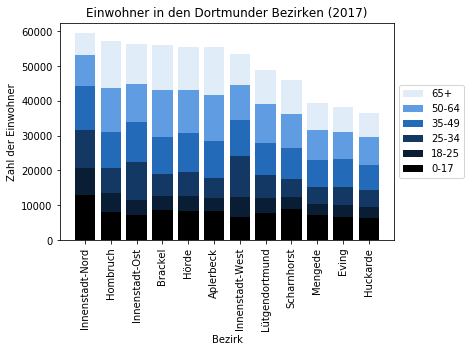

In [39]:
#Berechnen der Anzahl von Menschen unter 18 Jahre in der Gesamtbevölkerung 2017 in neuer Spalte
dortmund ['2017MenschenBis17'] = dortmund ['2017Alter0bis2'] + dortmund['2017Alter3bis5'] + dortmund['2017Alter6bis17']

alterbis17 = dortmund.sort_values('EinwohnerGesamt2017',ascending=False)['2017MenschenBis17']
alter18bis24 = dortmund.sort_values('EinwohnerGesamt2017',ascending=False)['2017Alter18bis24']
alter25bis34 = dortmund.sort_values('EinwohnerGesamt2017',ascending=False)['2017Alter25bis34']
alter35bis49 = dortmund.sort_values('EinwohnerGesamt2017',ascending=False)['2017Alter35bis49']
alter50bis64 = dortmund.sort_values('EinwohnerGesamt2017',ascending=False)['2017Alter50bis64']
alter65plus = dortmund.sort_values('EinwohnerGesamt2017',ascending=False)['2017MenschenAb65']
#die Variablen vorab zu definieren, ist nicht nötig, macht aber den Code unten etwas lesbarer.

serie0 = plt.bar(range(len(dortmund)), alterbis17, color='black')
serie1 = plt.bar(range(len(dortmund)), alter18bis24, bottom=alterbis17, color='#091D34') 
serie2 = plt.bar(range(len(dortmund)), alter25bis34, bottom=alterbis17+alter18bis24, color='#133863') #legt den Balken für "mittlere" auf den Balken für "junge"
serie3 = plt.bar(range(len(dortmund)), alter35bis49, bottom=alterbis17+alter18bis24+alter25bis34, color='#236AB9') 
serie4 = plt.bar(range(len(dortmund)), alter50bis64, bottom=alterbis17+alter18bis24+alter25bis34+alter35bis49, color='#609CE1') 
serie5 = plt.bar(range(len(dortmund)), alter65plus, bottom=alterbis17+alter18bis24+alter25bis34+alter35bis49+alter50bis64, color='#E1ECF9') 
plt.xticks(range(len(dortmund)), dortmund.sort_values('EinwohnerGesamt2017',ascending=False)['Stadtbezirk'],rotation=90) 


plt.title('Einwohner in den Dortmunder Bezirken (2017)') 
plt.xlabel('Bezirk') 
plt.ylabel('Zahl der Einwohner') 
plt.legend((serie5,serie4,serie3,serie2,serie1,serie0), ('65+','50-64','35-49','25-34','18-25','0-17'), loc='center left', bbox_to_anchor=(1, 0.5)) #Fügt eine Legende hinzu.

plt.show() 


# Hypothese 1a: Je geringer der Anteil an Ausländer_innen in einem Stadtbezirk, desto mehr Bürger_innen wählen die AfD

## Statistische Hypothese 1a: Es besteht ein postiver Korrelationskoeffizient (r) zwischen den Variablen Anzahl der Ausländer_innen in einem Bezirk und Anzahl der Zweitstimmen für die AfD 

### Datenbetrachtung Bundestagswahl 2013

In [18]:
#Erstellen der Spalte der realtiven Anzahl AfD Wähler_innen 2013
dortmund['RelZweitstimmenAfD2013'] = dortmund['AfDZweitstimmen2013'] / dortmund['GültigeZweitstimmen2013']

#Dataframe zur Anzeige der relevanten Daten zur Berechnung des Korrelationskoeffizienten zu Hypothese 1a für 2013
dortmundAuslAfD2013 = dortmund [['Stadtbezirk', 'EinwohnerGesamt2013','Deutsch2013', 'Ausländer2013', 'RelAusländer2013', 'AfDZweitstimmen2013', 'RelZweitstimmenAfD2013']]
#Anzeige aktualisierter Datensatz
dortmundAuslAfD2013.head(n=12)

,Stadtbezirk,EinwohnerGesamt2013,Deutsch2013,Ausländer2013,RelAusländer2013,AfDZweitstimmen2013,RelZweitstimmenAfD2013
0,Innenstadt-West,52031,44023,8008,0.153908,401,0.034373
1,Innenstadt-Nord,54992,31106,23886,0.434354,1205,0.039894
2,Innenstadt-Ost,54237,47682,6555,0.120858,985,0.036284
3,Eving,36780,29774,7006,0.190484,736,0.048475
4,Scharnhorst,44223,39230,4993,0.112905,774,0.039142
5,Brackel,54528,50515,4013,0.073595,1225,0.041923
6,Aplerbeck,54956,51816,3140,0.057137,1289,0.040382
7,Hörde,53310,47502,5808,0.108948,1146,0.040582
8,Hombruch,56536,51836,4700,0.083133,1395,0.041450
9,Lütgendortmund,48108,43557,4551,0.094600,984,0.042150


In [19]:
#Berechnen der "relativen" Korratation Ausländer_innenanteil zu AfD-Wähler_innenzahlen 2013
RelKorrelationAusländerWähler2013 = dortmund['RelAusländer2013'].corr(dortmund['RelZweitstimmenAfD2013'])
print(RelKorrelationAusländerWähler2013)

-0.02829058231987712


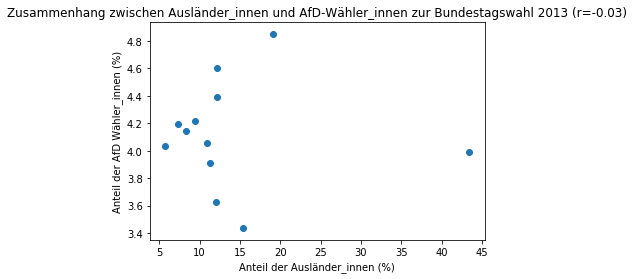

In [43]:
plt.scatter(dortmund['RelAusländer2013']*100, dortmund['RelZweitstimmenAfD2013']*100) #Umrechnung in Prozent
plt.xlabel('Anteil der Ausländer_innen (%)')
plt.ylabel('Anteil der AfD Wähler_innen (%)')
plt.title('Zusammenhang zwischen Ausländer_innen und AfD-Wähler_innen zur Bundestagswahl 2013 (r=-0.03)')
plt.show()

Ein Korrelationskoeffizient von rund -0,03 zeigt, dass zwischen den Variablen Ausländer_innenanzahl 2013 und Anzahl der AfD-Zweitstimmen 2013 kein signifikanter Zusammenhang besteht. Die Hypothese 1a wurde somit auf Grundage der Daten für das Jahr 2013 wiederlegt.

Um eine genauere Aussage treffen zu können ist es sinvoll, sich auch den Zusammenhang der Variablen Anzahl der Ausländer_innen und Wähler_innenquote der AfD zum Zeitpunkt der Bundestagswahl 2017 anzuschauen.

### Datenbetrachtung Bundestagswahl 2017

In [20]:
#Erstellen der Spalte der realtiven Anzahl AfD Wähler_innen 2017
dortmund['RelZweitstimmenAfD2017'] = dortmund['AfDZweitstimmen2017'] / dortmund['GültigeZweitstimmen2017']

#Dataframe zur Anzeige der relevanten Daten zur Berechnung des Korrelationskoeffizienten zu Hypothese 1a für 2017
dortmundAuslAfD2017= dortmund [['Stadtbezirk', 'EinwohnerGesamt2017','Deutsch2017', 'Ausländer2017', 'RelAusländer2017', 'AfDZweitstimmen2017', 'RelZweitstimmenAfD2017']]
#Anzeige aktualisierter Datensatz
dortmundAuslAfD2017.head(n=12)

,Stadtbezirk,EinwohnerGesamt2017,Deutsch2017,Ausländer2017,RelAusländer2017,AfDZweitstimmen2017,RelZweitstimmenAfD2017
0,Innenstadt-West,53323,43702,9621,0.180429,1148,0.099068
1,Innenstadt-Nord,59479,29035,30444,0.511845,2318,0.072241
2,Innenstadt-Ost,56354,48147,8207,0.145633,2114,0.074118
3,Eving,38327,29224,9103,0.237509,2169,0.138497
4,Scharnhorst,45875,38301,7574,0.165101,3053,0.149686
5,Brackel,56094,50266,5828,0.103897,3469,0.111734
6,Aplerbeck,55305,51188,4117,0.074442,2945,0.088476
7,Hörde,55518,47967,7551,0.136010,2726,0.089559
8,Hombruch,57054,51367,5687,0.099677,2682,0.076699
9,Lütgendortmund,48702,42435,6267,0.128681,3098,0.124924


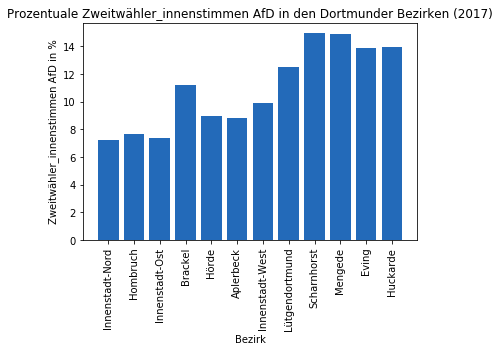

In [21]:
relZweitstimmenAfD2017 = dortmund.sort_values('EinwohnerGesamt2017',ascending=False)['RelZweitstimmenAfD2017']*100
#die Variablen vorab zu definieren, ist nicht nötig, macht aber den Code unten etwas lesbarer.

serie1 = plt.bar(range(len(dortmund)), relZweitstimmenAfD2017, color='#236AB9') 
plt.xticks(range(len(dortmund)), dortmund.sort_values('EinwohnerGesamt2017',ascending=False)['Stadtbezirk'],rotation=90) 


plt.title('Prozentuale Zweitwähler_innenstimmen AfD in den Dortmunder Bezirken (2017)') 
plt.xlabel('Bezirk') 
plt.ylabel('Zweitwähler_innenstimmen AfD in %')
plt.show() 

In [22]:
#Berechnen der "relativen" Korratation Ausländer_innenanteil zu AfD-Wähler_innenzahlen 2017
RelKorrelationAusländerWähler2017 = dortmund['RelAusländer2017'].corr(dortmund['RelZweitstimmenAfD2017'])
print(RelKorrelationAusländerWähler2017)

-0.1742611569287567


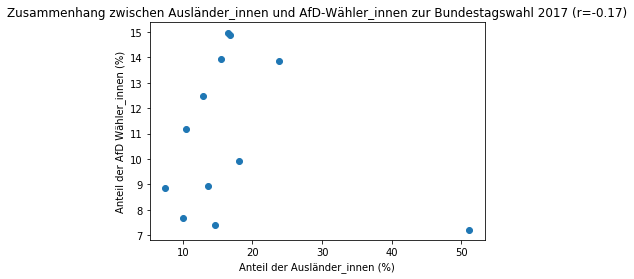

In [44]:
plt.scatter(dortmund['RelAusländer2017']*100, dortmund['RelZweitstimmenAfD2017']*100) #Umrechnung in Prozent
plt.xlabel('Anteil der Ausländer_innen (%)')
plt.ylabel('Anteil der AfD Wähler_innen (%)')
plt.title('Zusammenhang zwischen Ausländer_innen und AfD-Wähler_innen zur Bundestagswahl 2017 (r=-0.17)')
plt.show()

Der Korrelationskoeffizient von rund -0,17 zeigt, dass zwischen den Variablen Ausländer_innenanzahl 2017 und Anzahl der AfD-Zweitstimmen 2017 ein kein Zusammenhang erkennbar ist. Die negative Korrelation verdeutlicht, dass je mehr Ausländer_innen in einem Stadtteil wohnen, umso weniger Zweitstimmen wurden von den Büger_innen der AfD gegeben.

*Überleitung* Darum Zu-/ Wegzug Ausländer_innen und Entwicklung Zweitstimmen AfD betrachten...

# Hypothese 1b: Wächst der Anteil an Ausländer_innen in den Bezirken, nehmen die  Zweitstimmen der AfD ab

## Statistische Hypothese 1b: Es besteht eine negative Korrelation (r) zwischen den Variablen Anstieg des Ausländeranteils und Anstieg der AfD Zweitstimmen

In [23]:
#Berechnen der Differenz des relativen Ausländer_innenanteils der Jahre 2013 und 2017
dortmund['EntwAusländer1317'] = (dortmund['RelAusländer2017']) - (dortmund['RelAusländer2013']) 
#Berechnen der Differenz des relativen AfD-Zweitstimmenanteils der Jahre 2013 und 2017
dortmund['EntwWahlAfD1317'] = (dortmund['RelZweitstimmenAfD2017']) - (dortmund['RelZweitstimmenAfD2013']) 

#Dataframe zur Anzeige der relevanten Daten zur Berechnung des Korrelationskoeffizienten zu Hypothese 1b
dortmundEntwAusl= dortmund [['Stadtbezirk', 'RelAusländer2013', 'RelAusländer2017', 'EntwAusländer1317', 'RelZweitstimmenAfD2013', 'RelZweitstimmenAfD2017', 'EntwWahlAfD1317']]
#Anzeige aktualisierter Datensatz
dortmundEntwAusl.head(n=12)

,Stadtbezirk,RelAusländer2013,RelAusländer2017,EntwAusländer1317,RelZweitstimmenAfD2013,RelZweitstimmenAfD2017,EntwWahlAfD1317
0,Innenstadt-West,0.153908,0.180429,0.026520,0.034373,0.099068,0.064695
1,Innenstadt-Nord,0.434354,0.511845,0.077490,0.039894,0.072241,0.032347
2,Innenstadt-Ost,0.120858,0.145633,0.024775,0.036284,0.074118,0.037834
3,Eving,0.190484,0.237509,0.047025,0.048475,0.138497,0.090022
4,Scharnhorst,0.112905,0.165101,0.052196,0.039142,0.149686,0.110544
5,Brackel,0.073595,0.103897,0.030302,0.041923,0.111734,0.069810
6,Aplerbeck,0.057137,0.074442,0.017305,0.040382,0.088476,0.048093
7,Hörde,0.108948,0.136010,0.027062,0.040582,0.089559,0.048977
8,Hombruch,0.083133,0.099677,0.016545,0.041450,0.076699,0.035249
9,Lütgendortmund,0.094600,0.128681,0.034081,0.042150,0.124924,0.082774


In [24]:
#Berechnen der Korratation: Entwicklung Ausländer_innenanteil zu Entwicklung AfD-Wähler_innenstimmen von 2013 zu 2017
KorrelationEntwAuslAfD = dortmund['EntwAusländer1317'].corr(dortmund['EntwWahlAfD1317'])
print(KorrelationEntwAuslAfD)

0.23722398563775823


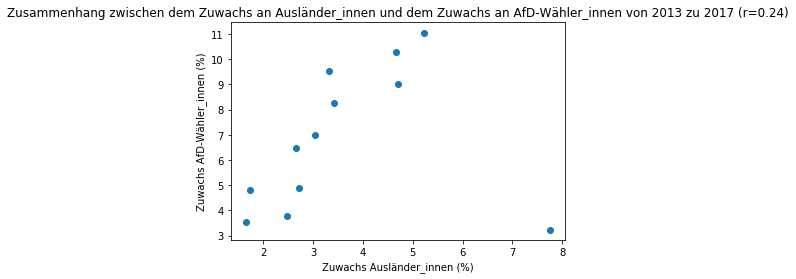

In [46]:
plt.scatter(dortmund['EntwAusländer1317']*100, dortmund['EntwWahlAfD1317']*100) #Umrechnung in Prozent
plt.xlabel('Zuwachs Ausländer_innen (%)')
plt.ylabel('Zuwachs AfD-Wähler_innen (%)')
plt.title('Zusammenhang zwischen dem Zuwachs an Ausländer_innen und dem Zuwachs an AfD-Wähler_innen von 2013 zu 2017 (r=0.24)')
plt.show()

Der Korrelationskoeffizient der Variablen Entwicklung des Ausländer_innenanteils zur Entwicklung der AfD-Wähler_innenstimmen von 2013 zu 2017 beträgt rund 0,24. Die positive Korrelation wiederlegt die Hypothese 1b, dass mit wachsender Anzahl an Ausländer_innen in einem Stadtbezirk die Zweitstimmenanzahl der AfD abnimmt. 

# Hypothese 2a: Je mehr Menschen im rentenfähigen Alter ab 65 Jahre in einem Bezirk leben, desto mehr Wähler_innenstimmen verzeichnet die AfD

## Statistische Hypothese 2a: Es besteht eine postive Korrelation (r) zwischen den Variablen Einwohner_innen ab 65 Jahren und Ergebnis der AfD-Zweitstimmen

### Datenbetrachtung Budestatgswahl 2013

In [25]:
#Dataframe zur Anzeige der relevanten Daten zur Berechnung des Korrelationskoeffizienten zu Hypothese 2a für 2013
dortmundRentnerAfD2013 = dortmund [['Stadtbezirk', 'EinwohnerGesamt2013','2013MenschenAb65', '2013RelMenschenAb65', 'AfDZweitstimmen2013', 'RelZweitstimmenAfD2013']]
#Anzeige aktualisierter Datensatz
dortmundRentnerAfD2013.head(n=12)

,Stadtbezirk,EinwohnerGesamt2013,2013MenschenAb65,2013RelMenschenAb65,AfDZweitstimmen2013,RelZweitstimmenAfD2013
0,Innenstadt-West,52031,8818,0.169476,401,0.034373
1,Innenstadt-Nord,54992,6475,0.117744,1205,0.039894
2,Innenstadt-Ost,54237,11557,0.213083,985,0.036284
3,Eving,36780,7145,0.194263,736,0.048475
4,Scharnhorst,44223,9602,0.217127,774,0.039142
5,Brackel,54528,12900,0.236576,1225,0.041923
6,Aplerbeck,54956,13235,0.240829,1289,0.040382
7,Hörde,53310,12177,0.228419,1146,0.040582
8,Hombruch,56536,13209,0.233639,1395,0.041450
9,Lütgendortmund,48108,9303,0.193377,984,0.042150


In [26]:
#Berechnen der Korratation von rel. Anzahl Menschen über 65 Jahre in der Gesamtbevölkerung zu rel. AfD-Wähler_innenzahlen 2013
KorrelationRentnerWähler2013 = dortmund['2013RelMenschenAb65'].corr(dortmund['RelZweitstimmenAfD2013'])
print(KorrelationRentnerWähler2013)

0.05470726227422979


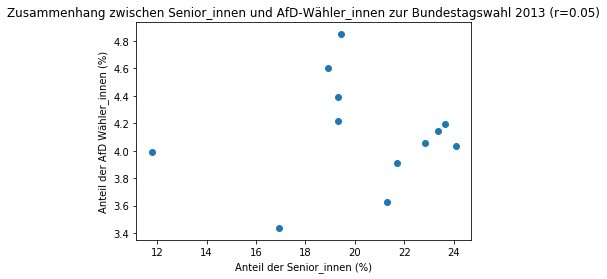

In [47]:
plt.scatter(dortmund['2013RelMenschenAb65']*100, dortmund['RelZweitstimmenAfD2013']*100) #Umrechnung in Prozent
plt.xlabel('Anteil der Senior_innen (%)')
plt.ylabel('Anteil der AfD Wähler_innen (%)')
plt.title('Zusammenhang zwischen Senior_innen und AfD-Wähler_innen zur Bundestagswahl 2013 (r=0.05)')
plt.show()

Der Korrelationskoeffizient von rund 0,05 deutet auf keinen Zusammenhang zwischen Relativer Anzahl an Renter_innen und der AfD Wahlquote hin. Die Hypothese 2a kann auf Grundlage der Daten des Jahres 2013 nicht bestätigt werden.

Nachfolgend wird zum Vergleich und zur weitere Analyse die Berechnung für das Jahr 2017 unternommen.

### Datenbetrachtung Budestatgswahl 2017

In [27]:
#Dataframe zur Anzeige der relevanten Daten zur Berechnung des Korrelationskoeffizienten zu Hypothese 2a für 2013
dortmundRentnerAfD2013 = dortmund [['Stadtbezirk', 'EinwohnerGesamt2017','2017MenschenAb65', '2017RelMenschenAb65', 'AfDZweitstimmen2017', 'RelZweitstimmenAfD2017']]
#Anzeige aktualisierter Datensatz
dortmundRentnerAfD2013.head(n=12)

,Stadtbezirk,EinwohnerGesamt2017,2017MenschenAb65,2017RelMenschenAb65,AfDZweitstimmen2017,RelZweitstimmenAfD2017
0,Innenstadt-West,53323,8915,0.167189,1148,0.099068
1,Innenstadt-Nord,59479,6463,0.108660,2318,0.072241
2,Innenstadt-Ost,56354,11526,0.204529,2114,0.074118
3,Eving,38327,7346,0.191666,2169,0.138497
4,Scharnhorst,45875,9692,0.211270,3053,0.149686
5,Brackel,56094,13052,0.232681,3469,0.111734
6,Aplerbeck,55305,13636,0.246560,2945,0.088476
7,Hörde,55518,12550,0.226053,2726,0.089559
8,Hombruch,57054,13424,0.235286,2682,0.076699
9,Lütgendortmund,48702,9534,0.195762,3098,0.124924


In [28]:
#Berechnen der Korratation von rel. Anzahl Menschen über 65 Jahre in der Gesamtbevölkerung zu rel. AfD-Wähler_innenzahlen 2017
KorrelationRentnerWähler2017 = dortmund['2017RelMenschenAb65'].corr(dortmund['RelZweitstimmenAfD2017'])
print(KorrelationRentnerWähler2017)

0.05045446498299143


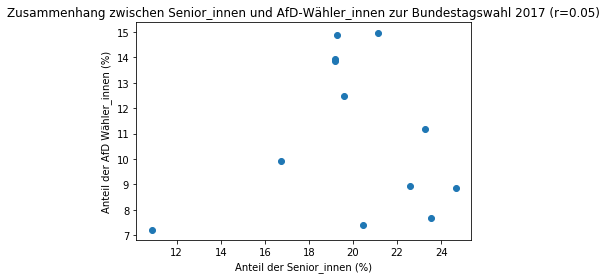

In [48]:
plt.scatter(dortmund['2017RelMenschenAb65']*100, dortmund['RelZweitstimmenAfD2017']*100) #Umrechnung in Prozent
plt.xlabel('Anteil der Senior_innen (%)')
plt.ylabel('Anteil der AfD Wähler_innen (%)')
plt.title('Zusammenhang zwischen Senior_innen und AfD-Wähler_innen zur Bundestagswahl 2017 (r=0.05)')
plt.show()

Auch in der Datenbetrachtung zum Jahr 2017 mit dem errechneten Korrelationskoeffizient von rund 0,05 wird deutlich, dass kein Zusammenhang zwischen den genannten Variablen besteht. Die Hypothese 2b kann auf Grundlage der Daten des Jahres 2017 ebenso nicht bestätigt werden.

# Hypothese 2b: Wenn die Anzahl älterer Menschen ab 65 Jahren in einem Bezirk zunimmt, verzeichnet die AfD höhere Wähler_inennstimmen 

## Statistische Hypothese 2b: Es besteht eine positive Korrelation (r) zwischen den Variablen des Anstiegs der Einwohner_innen über 65 Jahre und der ansteigenden Entwicklung der Anzahl verzeichneter AfD-Zweitstimmen

In [29]:
#Berechnen der Differenz des relativen Anteils von Menschen über 65 Jahren der Jahre 2013 und 2017
dortmund['EntwRentner1317'] = (dortmund['2017RelMenschenAb65']) - (dortmund['2013RelMenschenAb65']) 

#Dataframe zur Anzeige der relevanten Daten zur Berechnung des Korrelationskoeffizienten zu Hypothese 1b
dortmundEntwAusl= dortmund [['Stadtbezirk', '2013RelMenschenAb65', '2017RelMenschenAb65', 'EntwRentner1317', 'RelZweitstimmenAfD2013', 'RelZweitstimmenAfD2017', 'EntwWahlAfD1317']]
#Anzeige aktualisierter Datensatz
dortmundEntwAusl.head(n=12)

,Stadtbezirk,2013RelMenschenAb65,2017RelMenschenAb65,EntwRentner1317,RelZweitstimmenAfD2013,RelZweitstimmenAfD2017,EntwWahlAfD1317
0,Innenstadt-West,0.169476,0.167189,-0.002287,0.034373,0.099068,0.064695
1,Innenstadt-Nord,0.117744,0.108660,-0.009084,0.039894,0.072241,0.032347
2,Innenstadt-Ost,0.213083,0.204529,-0.008555,0.036284,0.074118,0.037834
3,Eving,0.194263,0.191666,-0.002597,0.048475,0.138497,0.090022
4,Scharnhorst,0.217127,0.211270,-0.005857,0.039142,0.149686,0.110544
5,Brackel,0.236576,0.232681,-0.003895,0.041923,0.111734,0.069810
6,Aplerbeck,0.240829,0.246560,0.005731,0.040382,0.088476,0.048093
7,Hörde,0.228419,0.226053,-0.002366,0.040582,0.089559,0.048977
8,Hombruch,0.233639,0.235286,0.001647,0.041450,0.076699,0.035249
9,Lütgendortmund,0.193377,0.195762,0.002385,0.042150,0.124924,0.082774


In [30]:
#Berechnen der Korratation Entwicklung Anteil der Menschen ab 65 Jahren zu Entwicklung AfD-Wähler_innenstimmen von 2013 zu 2017
KorrelationEntwRentnerAfD = dortmund['EntwRentner1317'].corr(dortmund['EntwWahlAfD1317'])
print(KorrelationEntwRentnerAfD)

0.19533140822569098


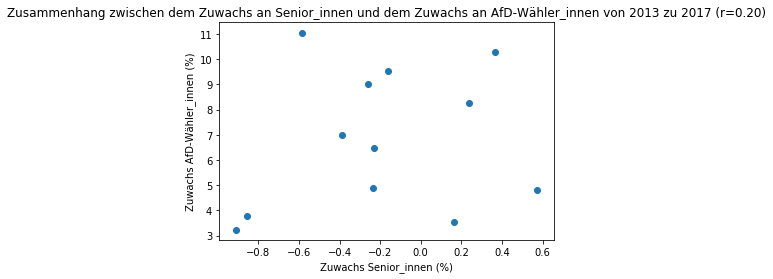

In [50]:
plt.scatter(dortmund['EntwRentner1317']*100, dortmund['EntwWahlAfD1317']*100) #Umrechnung in Prozent
plt.xlabel('Zuwachs Senior_innen (%)')
plt.ylabel('Zuwachs AfD-Wähler_innen (%)')
plt.title('Zusammenhang zwischen dem Zuwachs an Senior_innen und dem Zuwachs an AfD-Wähler_innen von 2013 zu 2017 (r=0.20)')
plt.show()

Der Korrelationskoeffizient der Variablen Entwicklung Anteil der Menschen ab 65 Jahren zu Entwicklung AfD-Wähler_innenstimmen von 2013 zu 2017 beträgt rund 0,20. Das bedeutet, die Hypothese 2b kann bedingt bestätigt werden. Es kann von einem leichten Zusammenhang zwischen der Entwicklung der Anzahl von Menschen im rentenfähigen Alter und der Wähler_innenquote der AfD in den Bezirken von Dortmund ausgegangen werden.

## Um eine Aussage zu Zusammenhängen der Altersstruktur der Einwohner Dortmunds und der dortigen AfD-Wählerquote treffen zu können, ist es notwendig auch die weiteren Altersgruppen zusammen zu fassen und zu betrachten. 

Es wurde sich dabei an der vorliegenden Einteilung der Altersabschnitte aus dem zur Verfügung gestellten Datensätzen der Stadt Dortmund orientiert: 18 bis 24, 25 bis 34, 35 bis 49 und 50 bis 64 Jährige.

*(Optional: Bei der Einteilung wurde sich an der Lebensspannenpsychologie orientiert? Lebensabschnitte: Bildungsphase, Erwerbstätigkeits- und Familienphase sowie Ruhestand)*

### zu 2a Betrachtung der Wähler_innengruppen unter 65 Jahre im Zusammenhang mit den AfD Wahlergebnissen von 2013

In [31]:
#Funktion mit Rückgabewert (return), damit in weiterem Code damit gearbeitet werden kann 
#a ist Anzahl Menschen Alter x in Jahr y, b ist Einwohnerzahl gesamt in Jahr y, c ist Relative AfD-Zweitstimmen in Jahr y
def korrelationskoeffizient (a, b, c):
    relAlter = a / b
    ergebnisKorr = relAlter.corr(c)                                  
    return(ergebnisKorr)

#Anwendung der Funktion für alle Altersabschnitte
ergebnis18bis24in2013 = korrelationskoeffizient(dortmund['2013Alter18bis24'],dortmund['EinwohnerGesamt2013'], dortmund['RelZweitstimmenAfD2013'])
print("Der Korrelationskoeffizient für die 18 bis 24 jährigen Dormunder in 2013 ist " + str(ergebnis18bis24in2013))
ergebnis25bis34in2013 = korrelationskoeffizient(dortmund['2013Alter25bis34'],dortmund['EinwohnerGesamt2013'], dortmund['RelZweitstimmenAfD2013'])
print("Der Korrelationskoeffizient für die 25 bis 34 jährigen Dormunder in 2013 ist " + str(ergebnis25bis34in2013))
ergebnis35bis49in2013 = korrelationskoeffizient(dortmund['2013Alter35bis49'],dortmund['EinwohnerGesamt2013'], dortmund['RelZweitstimmenAfD2013'])
print("Der Korrelationskoeffizient für die 35 bis 49 jährigen Dormunder in 2013 ist " + str(ergebnis35bis49in2013))
ergebnis50bis64in2013 = korrelationskoeffizient(dortmund['2013Alter50bis64'],dortmund['EinwohnerGesamt2013'], dortmund['RelZweitstimmenAfD2013'])
print("Der Korrelationskoeffizient für die 50 bis 64 jährigen Dormunder in 2013 ist " + str(ergebnis50bis64in2013))


Der Korrelationskoeffizient für die 18 bis 24 jährigen Dormunder in 2013 ist -0.1327253452350614
Der Korrelationskoeffizient für die 25 bis 34 jährigen Dormunder in 2013 ist -0.6372716696665257
Der Korrelationskoeffizient für die 35 bis 49 jährigen Dormunder in 2013 ist 0.1608049504193932
Der Korrelationskoeffizient für die 50 bis 64 jährigen Dormunder in 2013 ist 0.3788540811647598


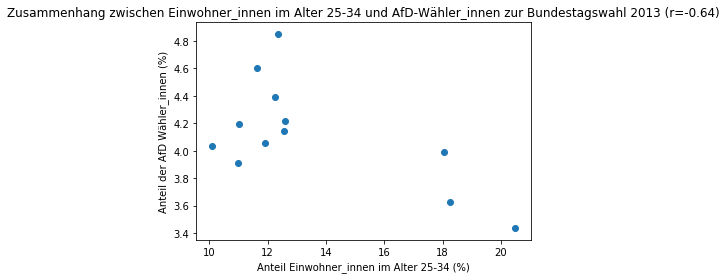

In [61]:
plt.scatter(dortmund['2013Alter25bis34']/dortmund['EinwohnerGesamt2013']*100, dortmund['RelZweitstimmenAfD2013']*100) #Umrechnung in Prozent
plt.xlabel('Anteil Einwohner_innen im Alter 25-34 (%)')
plt.ylabel('Anteil der AfD Wähler_innen (%)')
plt.title('Zusammenhang zwischen Einwohner_innen im Alter 25-34 und AfD-Wähler_innen zur Bundestagswahl 2013 (r=-0.64)')
plt.show()

Für die Bundestagswahlen 2013 sind zwei Zusammenhänge bemerkenswert:
Je mehr 25-34 Jährige in einem Bezirk leben, desto weniger Stimmen gehen an die AfD und eine größere Anzahl 50-64 Jähriger korreliert mit der Zahl der AfD-Zweitstimmen.

### zu 2a Betrachtung des Zsammenhangs aller Altersgruppen mit den AfD Wahlergebnissen für 2017 

In [32]:
ergebnis18bis24in2017 = korrelationskoeffizient(dortmund['2017Alter18bis24'],dortmund['EinwohnerGesamt2017'], dortmund['RelZweitstimmenAfD2017'])
print("Der Korrelationskoeffizient für die 18 bis 24 jährigen Dormunder in 2017 ist " + str(ergebnis18bis24in2017))
ergebnis25bis34in2017 = korrelationskoeffizient(dortmund['2017Alter25bis34'],dortmund['EinwohnerGesamt2017'], dortmund['RelZweitstimmenAfD2017'])
print("Der Korrelationskoeffizient für die 25 bis 34 jährigen Dormunder in 2017 ist " + str(ergebnis25bis34in2017))
ergebnis35bis49in2017 = korrelationskoeffizient(dortmund['2017Alter35bis49'],dortmund['EinwohnerGesamt2017'], dortmund['RelZweitstimmenAfD2017'])
print("Der Korrelationskoeffizient für die 35 bis 49 jährigen Dormunder in 2017 ist " + str(ergebnis35bis49in2017))
ergebnis50bis64in2017 = korrelationskoeffizient(dortmund['2017Alter50bis64'],dortmund['EinwohnerGesamt2017'], dortmund['RelZweitstimmenAfD2017'])
print("Der Korrelationskoeffizient für die 50 bis 64 jährigen Dormunder in 2017 ist " + str(ergebnis50bis64in2017))


Der Korrelationskoeffizient für die 18 bis 24 jährigen Dormunder in 2017 ist -0.24997287078619806
Der Korrelationskoeffizient für die 25 bis 34 jährigen Dormunder in 2017 ist -0.4392673201436792
Der Korrelationskoeffizient für die 35 bis 49 jährigen Dormunder in 2017 ist -0.17784951148158384
Der Korrelationskoeffizient für die 50 bis 64 jährigen Dormunder in 2017 ist 0.3810253720974506


*Würde bedeuten für 2017: gewisser Zusammenhang je mehr 18-24 desto weniger AfD-Zweitstimmen, bemerkenswerter Zusammenhang je mehr 25-34 Jährige wählen, desto weniger Stimmen gehen an die AfD, geringer Zusammenhang je mehr Dortmunder_innen im Alter von 35-49 Jahren in den Bezirken leben, desto weniger Zustimmung bekommt die AfD, bemerkenswerter Zusammenhang zwischen Anzahl 50-64 Jähriger und Anzahl der AfD-Zweitstimmen. Deckt sich weitestgehend mit den Ergebnissen von 2013, mit Ausnahme 35-49Jährigen, wie erklärbar? Evtl.: Nach vier Jahren Wählerschaft in gewisses Alter gewachsen und bei Wahlpräferenz geblieben-----Berechnung überprüfen ist an alles Stellen richtig, nicht nur hier, aber besonders hier, weil so vermeitlich aussagekräftige Zahlen entstehen* 

### Betrachtung der Entwicklung aller Wähler_innen zwischen den Jahren 2013 und 2017 und des Zusammenhangs  mit der Wahlstimmenentwicklung der AfD in diesem Zeitraum

In [33]:
#Funktion erstellen mit Rückgabewert, bestehend aus folgendenSchritten:
#Berechnen der Differenz des relativen Anteils von Menschen des Alters x 2013 und 2017
#Korratation Entwicklung Anteil der Menschen des Alters x zu Entwicklung AfD-Wähler_innenstimmen von 2013 zu 2017
#d ist die relative Zah der Menschen eines Alters x in 2017, e ist die relative Zah der Menschen eines Alters x in 2013,
#f ist Entwicklung AfD-Wähler_innenstimmen von 2013 zu 2017

def korrelationskoeffizientEntw (d, e, f):
    entwRelAlter = d - e
    ergebnisKorr = entwRelAlter.corr(f)                                  
    return(ergebnisKorr)
 
ergebnisEntw18bis24 = korrelationskoeffizientEntw(dortmund['2017RelMenschen18bis24'],dortmund['2013RelMenschen18bis24'], dortmund['EntwWahlAfD1317'])
print("Der Korrelationskoeffizient für die Entwicklung der 18 bis 24 jährigen Dormunder und den AfD-Zweitstimmen in den Jahren 2013 zu 2017 ist " + str(ergebnisEntw18bis24))
ergebnisEntw25bis34 = korrelationskoeffizientEntw(dortmund['2017RelMenschen25bis34'],dortmund['2013RelMenschen25bis34'], dortmund['EntwWahlAfD1317'])
print("Der Korrelationskoeffizient für die Entwicklung der 25 bis 34 jährigen Dormunder und den AfD-Zweitstimmen in den Jahren 2013 zu 2017 ist " + str(ergebnisEntw25bis34))
ergebnisEntw35bis49 = korrelationskoeffizientEntw(dortmund['2017RelMenschen35bis49'],dortmund['2013RelMenschen35bis49'], dortmund['EntwWahlAfD1317'])
print("Der Korrelationskoeffizient für die Entwicklung der 35 bis 49 jährigen Dormunder und den AfD-Zweitstimmen in den Jahren 2013 zu 2017 ist " + str(ergebnisEntw35bis49))
ergebnisEntw50bis64 = korrelationskoeffizientEntw(dortmund['2017RelMenschen50bis64'],dortmund['2013RelMenschen50bis64'], dortmund['EntwWahlAfD1317'])
print("Der Korrelationskoeffizient für die Entwicklung der 50 bis 64 jährigen Dormunder und den AfD-Zweitstimmen in den Jahren 2013 zu 2017 ist " + str(ergebnisEntw50bis64))

#Dataframe zur Anzeige Bevölkerungswachstums der Jahre wäre hier gut- herausfinden, wie aus Formel gewonnen werden kann  

Der Korrelationskoeffizient für die Entwicklung der 18 bis 24 jährigen Dormunder und den AfD-Zweitstimmen in den Jahren 2013 zu 2017 ist -0.48484325369132003
Der Korrelationskoeffizient für die Entwicklung der 25 bis 34 jährigen Dormunder und den AfD-Zweitstimmen in den Jahren 2013 zu 2017 ist 0.14895802683921014
Der Korrelationskoeffizient für die Entwicklung der 35 bis 49 jährigen Dormunder und den AfD-Zweitstimmen in den Jahren 2013 zu 2017 ist -0.015433758110633716
Der Korrelationskoeffizient für die Entwicklung der 50 bis 64 jährigen Dormunder und den AfD-Zweitstimmen in den Jahren 2013 zu 2017 ist -0.0678767941529513


*Würde bedeuten für Entwicklung 2013 zu 2017: Betrachtung Zu- oder Abnahme der Zahlen jeglicher Altergruppen wäre hier sinvoll, um eine Aussage treffen zu können* 

# Fazit

## Es konnten keine aussagekräftigen Zusammenhänge zwischen Anzahl an Ausländer_innen und AfD-Zweitstimmen in den Stadtbezirken festgestellt werden. DieHypothese 1, je geringer die Anzahl an Ausländer_innen in einem Bezirk, desto höher schneid

## Zu Hypothese 2...

Diskussion der Argumente s.o.: Betrachtungszeitraum nur Jahre 2013 udn 2017, Aussagekraft erst mit größerer Stcihprobenanzahl möglich, Zusammenhang ist nicht gleich Anhängigkeiten/ Vorraussetzungen/ Einfluss der Variablen


*(Einige Elemente könnten noch berechnet werden und jegliche Berechnungen sollten überprüft werden,an den jeweiligen Stellen markiert)*